# Param Count Models

In [126]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

In [170]:
class ModelWithParamCount:
    def __init__(self, model):
        self.model = model
        self.train_samples = 0
    
    def fit(self, X, y):
        self.train_samples = X.shape[0]
        self.model = self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def predict_log_proba(self, X):
        return self.model.predict_log_proba(X)

    # TODO: Maybe can delete?
    def score(self, X, y):
        return self.model.score(X, y)
    
    def get_param_count(self):
        pass

class LogisticRegressionParamCount(ModelWithParamCount):
    def __init__(self, model):
        super().__init__(model) # TODO: What does this call to super do given multiple inheritance?

    # TODO: add set_params function
    def set_params(self, params):
        print(params.shape)
        print(type(self.model))
        self.model.coef_ = params[:-1]
        self.model.intercept_ = params[-1]

    def get_param_count(self):
        return self.model.coef_.shape[1] + self.model.intercept_.shape[0]

class SVMParamCount(ModelWithParamCount):
    def __init__(self, model):
        super().__init__(model)
    
    def get_param_count(self):
        return self.train_samples + 1 # + 1 for bias term TODO: Check that this is correct

class MLPParamCount(ModelWithParamCount):
    def __init__(self, model):
        super().__init__(model)
    
    def get_param_count(self):
        print([layer.shape for layer in self.model.coefs_])
        num_weights = sum(np.prod(layer.shape) for layer in self.model.coefs_)
        num_biases = sum(np.prod(layer.shape) for layer in self.model.intercepts_)
        return num_weights + num_biases

class NaiveBayesParamCount(ModelWithParamCount):
    def __init__(self, model):
        super().__init__(model)
    
    def get_param_count(self):
        return self.model.n_features_in_ + 1

class KNNParamCount(ModelWithParamCount):
    def __init__(self, model):
        super().__init__(model)
    
    def get_param_count(self):
        return self.train_samples / self.model.n_neighbors # TODO: I don't have to round right?

class GaussianProcessParamCount(ModelWithParamCount):
    def __init__(self, model):
        super().__init__(model)
    
    def get_param_count(self):
        return self.train_samples * 2 # TODO: This might be way off

class DecisionTreeParamCount(ModelWithParamCount):
    def __init__(self, model):
        super().__init__(model)

    def set_params(self, params):
        self.model.tree_.value = params # TODO: Check 
    
    def get_param_count(self):
        return (self.model.tree_.node_count - 1) / 2

class RandomForestParamCount(ModelWithParamCount):
    def __init__(self, model):
        super().__init__(model)
    
    def get_param_count(self):
        return sum((estimator.tree_.node_count - 1) / 2 for estimator in self.model.estimators_)

In [171]:
# Generate data
samples = 100
dims = 5

np.random.seed(1)
x = np.random.randn(samples, dims)
y = np.random.randint(0, 2, samples)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

models = []
# Train model
# model = LogisticRegression(random_state=0)
models.append(LogisticRegressionParamCount(LogisticRegression(random_state=0)))
# model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
models.append(SVMParamCount(make_pipeline(StandardScaler(), SVC(gamma='auto'))))
# model = MLPClassifier(random_state=0, max_iter=300)
models.append(MLPParamCount(MLPClassifier(random_state=0, max_iter=300)))
# model = GaussianNB()
models.append(NaiveBayesParamCount(GaussianNB()))
# model = KNeighborsClassifier(n_neighbors=3)
models.append(KNNParamCount(KNeighborsClassifier(n_neighbors=3)))
# model = GaussianProcessClassifier(1.0 * RBF(1.0))
models.append(GaussianProcessParamCount(GaussianProcessClassifier(1.0 * RBF(1.0))))
# model = DecisionTreeClassifier(max_depth=5)
models.append(DecisionTreeParamCount(DecisionTreeClassifier(max_depth=5)))
# model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
models.append(RandomForestParamCount(RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)))

for model in models:
    print(model)
    model.fit(X_train, y_train)

    print(model.get_param_count())

6
81
[(5, 100), (100, 1)]
701
6
26.666666666666668
160
13.0
116.0


/home/berk/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.4


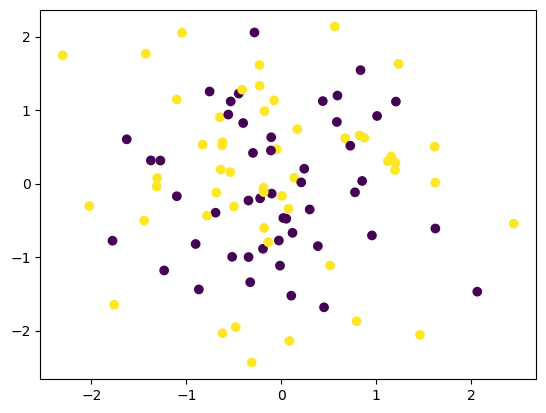

Accuracy: 0.45


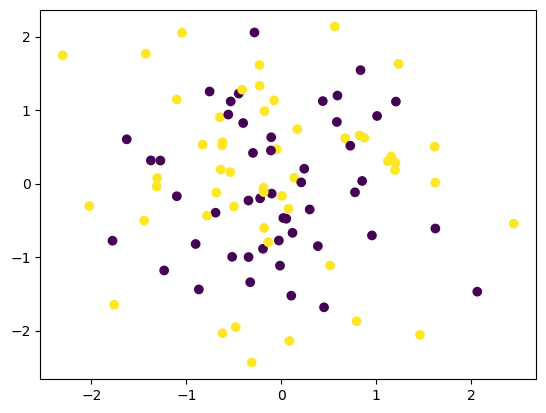

Accuracy: 0.3


/home/berk/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


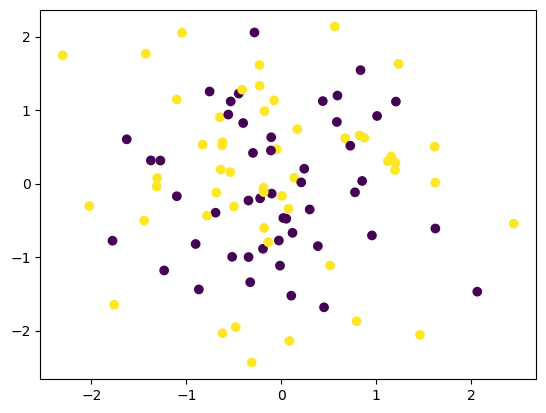

Accuracy: 0.4


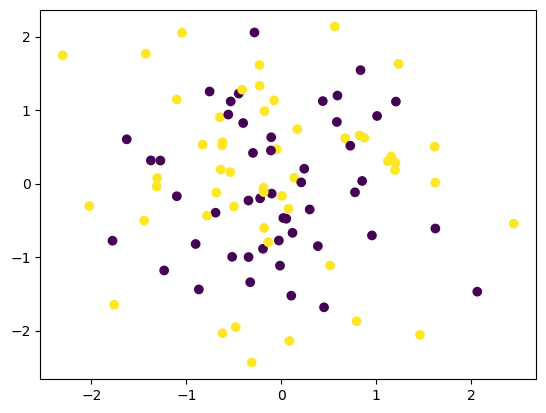

Accuracy: 0.35


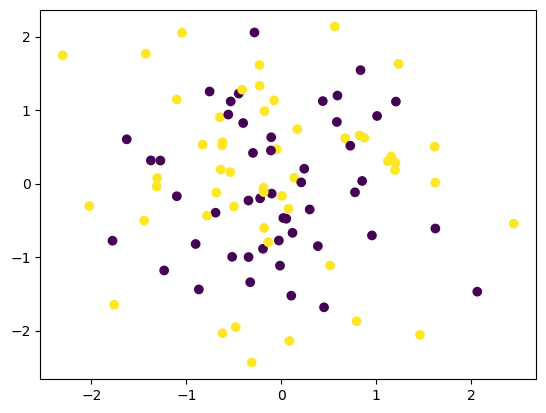

Accuracy: 0.45


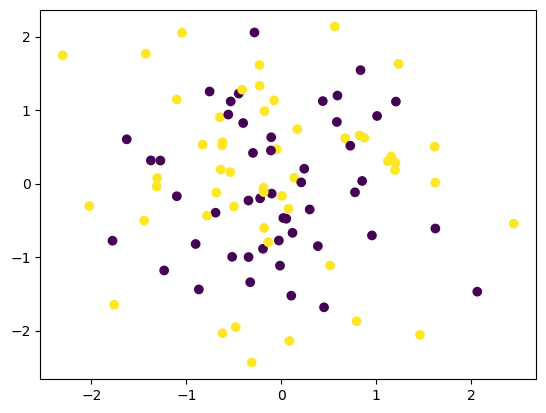

Accuracy: 0.55


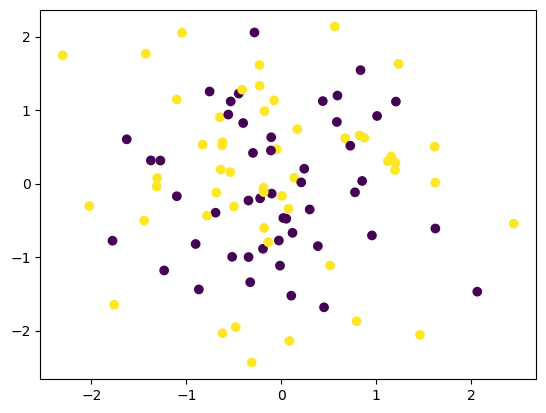

Accuracy: 0.4


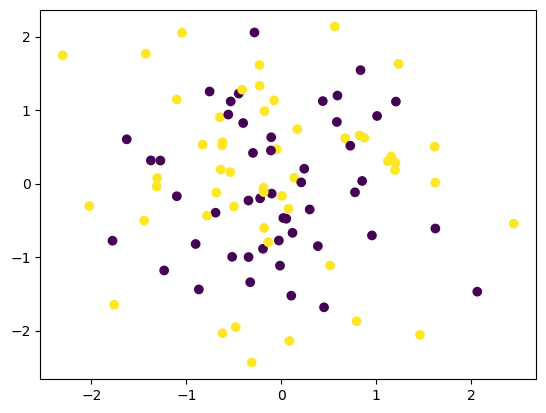

In [165]:
for model in models:
    print(model)
    model.fit(X_train, y_train)
    # Evaluate model
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    # Plot data
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.show()

# Model Selection

In [168]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import emcee

class ModelAggregator:
    def __init__(self, random_state=42, averaging=None, k_avg=3):
        self.random_state = random_state
        self.averaging = averaging
        self.k_avg = k_avg

    def fit(self, x, y, classification_models):
        pass
    
    def predict(self, x):
        pass

    def construct_classifier(self, classification_models, scores, x, y):
        scores = np.array(scores)

        if self.averaging == "simple":
            optimal_model_indices = np.argsort(scores)[-self.k_avg:]

            self.classifier = WeightedClassifier([classification_models[i].fit(x, y) for i in optimal_model_indices], [1 / self.k_avg] * self.k_avg)

        elif self.averaging == "exponential":
            optimal_model_indices = np.argsort(scores)[-self.k_avg:]
            weights = np.exp(scores[optimal_model_indices])
            weights /= weights.sum()
            
            self.classifier = WeightedClassifier([classification_models[i].fit(x, y) for i in optimal_model_indices], weights)

        elif self.averaging == "direct":
            optimal_model_indices = np.argsort(scores)[-self.k_avg:]
            weights = scores[optimal_model_indices]
            weights /= weights.sum()
        
            self.classifier = WeightedClassifier([classification_models[i].fit(x, y) for i in optimal_model_indices], weights)

        elif self.averaging is None:
            optimal_model_index = np.argmax(scores)
            
            self.classifier = classification_models[optimal_model_index].fit(x, y) # TODO: Do we want to have the fully trained version here?


class WeightedClassifier:
    def __init__(self, classifiers, weights):
        self.classifiers = classifiers
        self.weights = weights

    def predict(self, x):
        # print(type(self.classifiers[0]))
        prediction_prob = np.average([classifier.predict_proba(x) for classifier in self.classifiers], axis=0, weights=self.weights)[:, 1]
        return np.where(prediction_prob > 0.5, 1, 0)


class HoldOutValidation(ModelAggregator):
    def __init__(self, test_size=0.5, averaging=None, k_avg=3, random_state=42):
        """
        averaging: {'simple', 'exponential', 'direct', None}, default=None
        """
        super().__init__(random_state, averaging, k_avg)
        self.test_size = test_size

    def fit(self, x, y, classifiers):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=self.test_size, random_state=self.random_state)

        accuracies = []
        
        for classifier in classifiers:
            clf = classifier.fit(x_train, y_train)
            
            accuracies.append(clf.score(x_test, y_test))

        self.construct_classifier(classifiers, accuracies, x, y)
        
        return self

    def predict(self, x):
        return self.classifier.predict(x)


class CrossValidation(ModelAggregator):
    def __init__(self, cv=5, averaging=None, k_avg=3, random_state=42):
        """
        averaging: {'simple', 'exponential', None}, default=None
        """
        super().__init__(random_state, averaging, k_avg)
        self.cv = cv

    def fit(self, x, y, classification_models):
        accuracies = []
        
        for classification_model in classification_models:
            scores = cross_val_score(classification_model.model, x, y, cv=self.cv)

            accuracies.append(scores.mean())

        self.construct_classifier(classification_models, accuracies, x, y)
        
        return self

    def predict(self, x):
        return self.classifier.predict(x)


# class PenaltyMethod(ModelAggregator):
#     def __init__(self, alpha=1, averaging=None, k_avg=3, random_state=42):
#         """
#         averaging: {'simple', 'exponential', None}, default=None
#         """
#         super().__init__(random_state, averaging, k_avg)
#         self.alpha = 1

#     def fit(self, x, y, classification_models):
#         accuracies = []
        
#         for classification_model in classification_models:
#             clf = classification_model.fit(x, y)
            
#             accuracies.append(clf.score(x, y) + self.alpha * classification_model.get_param_count())

#         self.construct_classifier(classification_models, accuracies, x, y)
        
#         return self

#     def predict(self, x):
#         return self.classifier.predict(x)


# class BayesianModelSelection(ModelAggregator):
#     def __init__(self, cv=5, averaging=None, k_avg=3, random_state=42, mcmc_steps=100, mcmc_walkers=100):
#         """
#         averaging: {'simple', 'exponential', None}, default=None
#         """
#         super().__init__(random_state, averaging, k_avg)
#         self.cv = cv
#         self.mcmc_steps = mcmc_steps
#         self.mcmc_walkers = mcmc_walkers

#     def get_bayes_factor(self, classifier, x, y):
#         # Want to estimate P(D | M_i)
#         # Estimate the bayes factor for the classification_model using MCMC in code

#         def log_posterior(params):
#             # Set the parameters of Model A
#             classifier.set_params(params)
#             # print(type(classifier))
#             # print(params.shape)
#             # classifier.coef_ = params[:-1]
#             # classifier.intercept_ = params[-1]

#             log_likelihood = log_loss(y, classifier.predict_proba(x))

#             # Return the log posterior probability
#             return log_likelihood

#         ndim = classifier.get_param_count()
#         initial_pos = np.random.randn(self.mcmc_walkers, ndim)

#         sampler = emcee.EnsembleSampler(self.mcmc_walkers, ndim, log_posterior)
#         sampler.run_mcmc(initial_pos, self.mcmc_steps)
#         log_likelihood = sampler.get_log_prob()
#         log_bayes_factor = np.mean(log_likelihood)

#         return np.exp(log_bayes_factor)

#     def fit(self, x, y, classifiers):
#         # Select the model with the largest bayes factor!
#         # Can do weighting for averaging using posterior odds, which is just uniform prior times bayes factor!
#         bayes_factors = []
        
#         for classifier in classifiers:
#             # print(type(classifier))
#             classifier.fit(x, y)

#             bayes_factors.append(self.get_bayes_factor(classifier, x, y))

#         self.construct_classifier(classifiers, bayes_factors, x, y)
        
#         return self

#     def predict(self, x):
#         return self.classifier.predict(x)

In [169]:
model_1 = LogisticRegressionParamCount(LogisticRegression(random_state=0, penalty="l1", C=1.0, solver="liblinear"))
model_2 = LogisticRegressionParamCount(LogisticRegression(random_state=0, penalty="l2", C=1.2, solver="lbfgs"))

# 'simple', 'exponential', 'direct', None

hold_out_validation1 = HoldOutValidation(test_size=0.2, averaging="simple", k_avg=2, random_state=42)
hold_out_validation2 = HoldOutValidation(test_size=0.2, averaging="exponential", k_avg=2, random_state=42)
hold_out_validation3 = HoldOutValidation(test_size=0.2, averaging="direct", k_avg=2, random_state=42)
hold_out_validation4 = HoldOutValidation(test_size=0.2, averaging=None, k_avg=2, random_state=42)

hold_out_validation1.fit(X_train, y_train, [model_1, model_2])
print(f"Hold Out 1: {hold_out_validation1.predict(X_test)}")

hold_out_validation2.fit(X_train, y_train, [model_1, model_2])
print(f"Hold Out 2: {hold_out_validation2.predict(X_test)}")

hold_out_validation3.fit(X_train, y_train, [model_1, model_2])
print(f"Hold Out 3: {hold_out_validation3.predict(X_test)}")

hold_out_validation4.fit(X_train, y_train, [model_1, model_2])
print(f"Hold Out 4: {hold_out_validation4.predict(X_test)}")

cross_validation = CrossValidation(cv=5, averaging="simple", k_avg=2, random_state=42)
cross_validation.fit(X_train, y_train, [model_1, model_2])

print(f"Cross Validation: {cross_validation.predict(X_test)}")

penalty_method = PenaltyMethod(alpha=1, averaging="simple", k_avg=2, random_state=42)
penalty_method.fit(X_train, y_train, [model_1, model_2])

print(f"Penalty Method: {penalty_method.predict(X_test)}")

bayesian_model_selection = BayesianModelSelection(cv=5, averaging="simple", k_avg=2, random_state=42)
bayesian_model_selection.fit(X_train, y_train, [model_1, model_2])

print(f"Bayesian Model Selection: {bayesian_model_selection.predict(X_test)}")

Hold Out 1: [1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0]
Hold Out 2: [1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0]
Hold Out 3: [1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0]
Hold Out 4: [0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0]
Cross Validation: [1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0]
Penalty Method: [1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0]
(6,)
<class 'sklearn.linear_model._logistic.LogisticRegression'>
emcee: Exception while calling your likelihood function:
  params: [ 0.29212576 -0.09209649 -1.26469166 -1.19895518  0.83319893  0.3123821 ]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/home/berk/anaconda3/lib/python3.9/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/tmp/ipykernel_342933/358585871.py", line 155, in log_posterior
    log_likelihood = log_loss(y, classifier.predict_proba(x))
  File "/tmp/ipykernel_342933/4150657179.py", line 15, in predict_proba
    return self.model.predict_proba(X)
  File "/home/berk/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1372, in predict_proba
    return super()._predict_proba_lr(X)
  File "/home/berk/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py", line 434, in _predict_proba_lr
    prob = self.decision_function(X)
  File "/home/berk/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py", line 402, in decision_function
    return xp.reshape(scores, -1) if scores.shape[1] == 1 else scores
IndexError: tuple index out of range


IndexError: tuple index out of range